# DNN Models

In [1]:
#pip install scikeras

In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import Dropout
from keras.regularizers import l1, l2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from scikeras.wrappers import KerasClassifier

## Sequential Model

### Importing data

In [115]:
df = pd.read_csv("C:/Users/Guo Xiang/OneDrive/Desktop/Healthcare/pima-indians-diabetes(edited).csv") #if no header, header=None

In [116]:
X = df.drop(columns='Diabetes(Y/N)')
Y = df['Diabetes(Y/N)']
X.head()  #double check the featureset

,No. of times Pregnant,Plasma glucose concentration,Diastolic(BP),Triceps Skin fold thickness,2-hour serum insulin,BMI,Diabetes pedigree function,Age
0,0.639947,0.865105,-0.036562,0.824667,0.313527,0.166203,0.468492,1.425995
1,-0.844885,-1.206164,-0.539484,0.017945,0.313527,-0.852620,-0.365061,-0.190672
2,1.233880,2.015811,-0.707124,0.017945,0.313527,-1.332922,0.604397,-0.105584
3,-0.844885,-1.074655,-0.539484,-0.788777,-1.079165,-0.634300,-0.920763,-1.041549
4,-1.141852,0.503455,-2.718810,0.824667,0.596594,1.548891,5.484909,-0.020496


In [117]:
Y.head() # double check target set

0    1
1    0
2    1
3    0
4    1
Name: Diabetes(Y/N), dtype: int64

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)


### Initial model

4 hidden layers:
12
16
16
14

epochs: 150, batch size: 10

In [165]:
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation = 'relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=150, batch_size=10)

Epoch 1/150


C:\Users\Guo Xiang\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.6938 - loss: 0.6595
Epoch 2/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.7846 - loss: 0.5341
Epoch 3/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.7844 - loss: 0.4802
Epoch 4/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.7819 - loss: 0.4628
Epoch 5/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.7893 - loss: 0.4516 
Epoch 6/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.7863 - loss: 0.4426
Epoch 7/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.7894 - loss: 0.4345
Epoch 8/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7959 - loss: 0.4279
Epoch 9/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.8032 - loss: 0.4207
Epoch 10/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.8126 - loss: 0.4152
Epoch 11/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.8121 - loss: 0.4104
Epoch 12/150
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step 

In [166]:
_, accuracy = model.evaluate(X_train,y_train)
print('Accuracy: %.2f'% (accuracy*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.9300 - loss: 0.2187
Accuracy: 92.51


In [167]:
_, accuracy = model.evaluate(X_test,y_test)
print('Accuracy: %.2f'% (accuracy*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7281 - loss: 1.4319
Accuracy: 74.03


## Hyper Paramter Tuning

Using GridSearch

### Tune Epoch and Batch_size

In [21]:
#Model is needed for KerasClassifier
def create_model():
    model = Sequential()
    model.add(Dense(8, input_shape=(8,), activation = 'relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#Fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)

#Define parameters
batch_size = [10,30,50,60,80,100,150]
epochs = [10,20,30,50,100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

#Fit into GridSearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3) #n_jobs=-1: take advantage of all CPU cores for faster computation 
grid_result = grid.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

    


C:\Users\Guo Xiang\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.752328 using {'batch_size': 50, 'epochs': 30}
0.713222 (0.021556) with: {'batch_size': 10, 'epochs': 10}
0.739292 (0.006968) with: {'batch_size': 10, 'epochs': 20}
0.743017 (0.036205) with: {'batch_size': 10, 'epochs': 30}
0.722533 (0.014663) with: {'batch_size': 10, 'epochs': 50}
0.674115 (0.010534) with: {'batch_size': 10, 'epochs': 100}
0.744879 (0.013935) with: {'batch_size': 30, 'epochs': 10}
0.731844 (0.016446) with: {'batch_size': 30, 'epochs': 20}
0.741155 (0.014663) with: {'batch_size': 30, 'epochs': 30}
0.718808 (0.014663) with: {'batch_size': 30, 'epochs': 50}
0.707635 (0.017269) with: {'batch_size': 30, 'epochs': 100}
0.690875 (0.032998) with: {'batch_size': 50, 'epochs': 10}
0.724395 (0.036870) with: {'batch_size': 50, 'epochs': 20}
0.752328 (0.025122) with: {'batch_size': 50, 'epochs': 30}
0.722533 (0.033623) with: {'batch_size': 50, 'epochs': 50}
0.711359 (0.009495) with: {'batch_size': 50, 'epochs': 100}
0.696462 (0.033623) with: {'batch_size': 60, 'epochs': 10}

### Tune Dropout and l1 Regularization

In [238]:
# Define the model creation function
def create_model(dropout_rate=0.2, lambda_val=0.001):
    model = Sequential()
    model.add(Dense(8, input_shape=(8,), activation = 'relu', kernel_regularizer=l1(lambda_val)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12, activation='relu', kernel_regularizer=l1(lambda_val)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1(lambda_val)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='relu', kernel_regularizer=l1(lambda_val)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(14, activation='relu', kernel_regularizer=l1(lambda_val)))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# Create model
model = KerasClassifier(build_fn=create_model, verbose=0, epochs=30, batch_size=50)

# Define parameters for GridSearchCV
dropout_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
lambda_val = [0.001, 0.01, 0.1]

# Correcting the param_grid to ensure proper parameter passing
param_grid = dict(model__dropout_rate=dropout_rate, model__lambda_val=lambda_val)

# Fit the model using GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\Guo Xiang\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\Guo Xiang\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Guo Xiang\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.744222 using {'model__dropout_rate': 0.1, 'model__lambda_val': 0.001}
0.744222 (0.028783) with: {'model__dropout_rate': 0.1, 'model__lambda_val': 0.001}
0.671105 (0.029371) with: {'model__dropout_rate': 0.1, 'model__lambda_val': 0.01}
0.656351 (0.003164) with: {'model__dropout_rate': 0.1, 'model__lambda_val': 0.1}
0.726389 (0.037245) with: {'model__dropout_rate': 0.2, 'model__lambda_val': 0.001}
0.656351 (0.003164) with: {'model__dropout_rate': 0.2, 'model__lambda_val': 0.01}
0.656351 (0.003164) with: {'model__dropout_rate': 0.2, 'model__lambda_val': 0.1}
0.708503 (0.035128) with: {'model__dropout_rate': 0.3, 'model__lambda_val': 0.001}
0.656351 (0.003164) with: {'model__dropout_rate': 0.3, 'model__lambda_val': 0.01}
0.656351 (0.003164) with: {'model__dropout_rate': 0.3, 'model__lambda_val': 0.1}
0.656351 (0.003164) with: {'model__dropout_rate': 0.4, 'model__lambda_val': 0.001}
0.656351 (0.003164) with: {'model__dropout_rate': 0.4, 'model__lambda_val': 0.01}
0.656351 (0.003164)

## Edited Model

In [245]:
model = Sequential()
#Input Layer---------------------------------------------------------------------------------------
model.add(Dense(8, input_shape=(8,), activation = 'relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))
#--------------------------------------------------------------------------------------------------

#Hidden layers-------------------------------------------------------------------------------------
model.add(Dense(12, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))
model.add(Dense(14, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))
#---------------------------------------------------------------------------------------------------
    
#Output layer---------------------------------------------------------------------------------------
model.add(Dense(1, activation='sigmoid'))
#---------------------------------------------------------------------------------------------------

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=30, batch_size=50)

Epoch 1/30


C:\Users\Guo Xiang\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6759 - loss: 0.8613
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.6685 - loss: 0.8322
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6768 - loss: 0.7932
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6721 - loss: 0.7812
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6813 - loss: 0.7532
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6907 - loss: 0.7499
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.6922 - loss: 0.7273
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.6960 - loss: 0.7091
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.6907 - loss: 0.7027
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7145 - loss: 0.6977
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7360 - loss: 0.6853
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7220 - loss:

In [246]:
_, accuracy = model.evaluate(X_train,y_train)
print('Accuracy: %.2f'% (accuracy*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8118 - loss: 0.5519 
Accuracy: 78.66


In [247]:
_, accuracy = model.evaluate(X_test,y_test)
print('Accuracy: %.2f'% (accuracy*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7710 - loss: 0.5857 
Accuracy: 75.32


## Add Early Stopping

In [251]:
from tensorflow.keras.callbacks import EarlyStopping

# Create the Model
model = Sequential()

# Input Layer
model.add(Dense(8, input_shape=(8,), activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))

# Hidden Layers
model.add(Dense(12, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))
model.add(Dense(14, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Add EarlyStopping Callback
early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               patience=5,          # Wait 5 epochs for improvement
                               restore_best_weights=True)  # Restore best weights

# Fit the Model with Early Stopping
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),  # Validation data required
                    epochs=100,                      # Add more epochs to take advatange of early stopping
                    batch_size=50,
                    callbacks=[early_stopping],      # Add callback
                    verbose=1)


Epoch 1/100


C:\Users\Guo Xiang\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4150 - loss: 0.9134 - val_accuracy: 0.6688 - val_loss: 0.8623
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5509 - loss: 0.8747 - val_accuracy: 0.6299 - val_loss: 0.8449
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6391 - loss: 0.8573 - val_accuracy: 0.6299 - val_loss: 0.8290
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6534 - loss: 0.8304 - val_accuracy: 0.6299 - val_loss: 0.8142
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6652 - loss: 0.8116 - val_accuracy: 0.6299 - val_loss: 0.7972
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6726 - loss: 0.7875 - val_accuracy: 0.6364 - val_loss: 0.7792
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7033 - loss: 0.7695 - val_accuracy: 0.6364 - val_loss: 0.7614
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6907 - loss: 0.7523 - val_accuracy: 0.6753 - val_loss: 0.

In [252]:
_, accuracy = model.evaluate(X_train,y_train)
print('Accuracy: %.2f'% (accuracy*100))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.8114 - loss: 0.4693
Accuracy: 78.50


In [253]:
_, accuracy = model.evaluate(X_test,y_test)
print('Accuracy: %.2f'% (accuracy*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.5444
Accuracy: 77.92


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Confusion Matrix:
[[85 12]
 [21 36]]


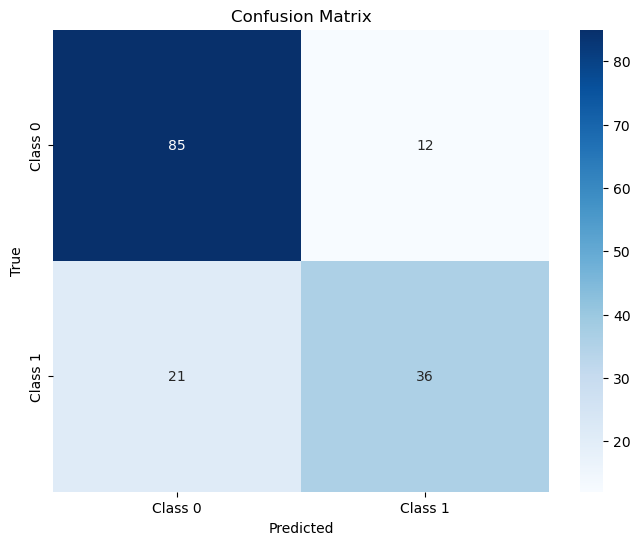


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        97
           1       0.75      0.63      0.69        57

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [216]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a trained model and test data
# model: trained DNN model
# X_test: features of the test set
# y_test: true labels of the test set

# Make predictions
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


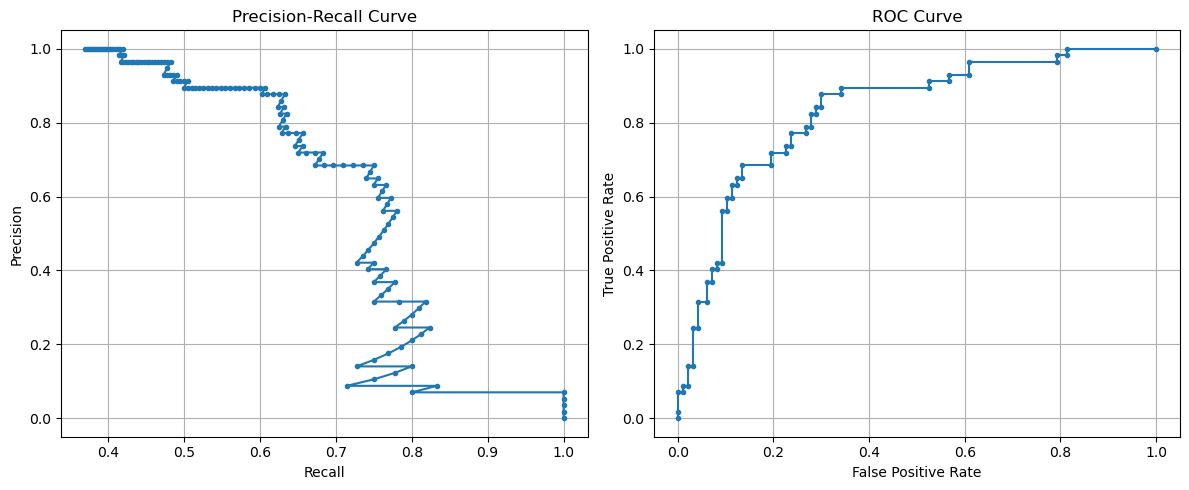

In [127]:
from sklearn.metrics import precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test)  # Predict probabilities

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # Precision-Recall Curve
plt.plot(*precision_recall_curve(y_test, y_pred_probs)[:2], marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(1, 2, 2)  # ROC Curve
plt.plot(*roc_curve(y_test, y_pred_probs)[:2], marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

plt.tight_layout()
plt.show()
